In [2]:
%run import.py

# Feature Engineering #

In many applications of machine learning it is important to consider how to represent your data. with continous data some of the  choices come down to scaling of features or including feature interactions. Another pretty common type of feature in a dataset is categorical features. These are features that are not numeric. These can be features that are binary like "yes and "no" or have multiple discrete options like car color. For catigorical features a single instance can only belong to one category. Since these are not numeric we need to have a way to represent them. The way that you chose to represent them can have enormous efffects on the preformance of machine learning algorithms. The question of how to best represent your data set is known as **feature engineering**.

# Representing Categorical Data #

To understand how to represent a data set with catgorical features we are going to use a dataset from the 1994 census database. Our task is to detemine if a given worker makes over \\$50,000 or under \\$50,000. The features in this dataset include ages, how they are employed (self-employed, private industry, government industry, government industry, etc.), education, gender, working hours per week, occupation and more. lets look at the first ten enteries of the dataset:

In [3]:
#adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data") 
# The file has no headers naming the columns, so we pass header=None and provide the column names explicitly in "names"
data = pd.read_csv("adult.data", header=None, index_col=False,names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
               'marital-status', 'occupation', 'relationship', 'race', 'gender',
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
               'income'])

In [4]:
display(data.head(10))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


The first thing to understand is what type of task we are to preform. Since we are only looking at the \\$50,000 threshold we have a binary classification problem. Although we could re-word the problem to predict the exact salary but it would be more complicated. The 50,000 thrshold on its own is interesting to understand.

In our dataset, age and hours-per-week are continous features which we know how to trteat. Features like workclass, education, sex, and occupation  are categorical and come from a fixed list of possible values. We need a way to represent these well so that we can use these features for machine learning. to understand this lets take logistic regression as a n example. Logistic regression makes prediction $\hat{y}$ using the following formula:

$\hat{y}=w[0]*x[0]+w[1]*x[1]+...w[p]*x[p]+b > 0$

where $w[i]$ and $b$ are coefficients learned from the training set and the x[i] are the input features. this makes sense if all the $x[i]'s$ are numbers but if $x[3]$ is 'Male' or 'Female' this does not work. We need a way to represent our categorical  data before we can apply logisitc regression to this problem.

## One-Hot-Encoding and Dummy Variables

one of the most common ways to represent categorical data is by using one-hot-encoding or one-out-of-N encoding, also known as dummy variables. The idea behiond the dummy vaiable is to create a new feature for each possible category and then encode a 1 id the data point is of that category asnd a 0 if it is not. Let's take the gender feature for example. We would create two new features, Male and Female, and would encode 1 or 0 in each column depending on the gender of the individual.We can do this in two ways using either pandas or sci-kit learn. We will start with pandas.

First lets select only part of the data in order to see what is going on:

In [5]:
data=data[['age','workclass','education','gender','hours-per-week','occupation','income']]

display(data.head(10))

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


Before we look at encoding categorical variable we first should look at how many categories there are. A good way to do this is to use the valu_counts method of a series, to show us the unique values and how often they appear:

In [6]:
print(data.workclass.value_counts())

print(data.education.value_counts())

print(data.gender.value_counts())

print(data.occupation.value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
gender
 Male      21790
 Female    10771
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1

From this we can see that workclass has 9 categories, education had 16 categories, gender has 2 categories and occupation has 15 categories. Each of these columns can be encoded using one-hot-encoding.

The easiest way to encode the data in pandas is using the get_dummies function. This function automatically transforms all columns that have object type or are categorical. Lets use this on our dataset:

In [7]:
data_dummies=pd.get_dummies(data)

data_dummies.head(10)


,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5,37,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,49,16,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7,52,45,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
8,31,50,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9,42,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


As we can see here the age and hours-per-week features have not been transformed because they are continous features. We can now use the values attribute of the DataFrame to convert it into a NUMPY array and then train a machine learning model on it. We need to make sure we do not include the income, which has been split into 2 coulmns. We can get our data as follows:

In [8]:
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print('X.Shape: {} y.shape{}'.format(X.shape, y.shape))

X.Shape: (32561, 44) y.shape(32561,)


Now that the data is in a form that scikit-learn can work with we can proceed to train a Logistic Regression model on the data:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


This is not bad and by transforming the data we are actually able to run logistic regression using all 44 features instead of leaving out the non-categorical features. Had we only considered numerical data types we would get the following accuracy:

In [10]:
X=data.select_dtypes('number')
display(X.head())
X=X.values


y=pd.get_dummies(data.income)
y=y.iloc[:,0]
y=y.values

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

,age,hours-per-week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40


Test score: 0.75


By incorperating the categorical features we get a 6% improvment in our accuracy. One thing that needs to be considered when using pandas get_dummies method is that it only treats features with string labels as categorical. Many times categorical data is listed as integers. Here it is iportant to treat the feature as a discrtet category and not a continius value. to make this point lets create a dat frame with two columns. One will have data labeled by the numbers 0,1 and 2 and the other will be labeled with the strings f0x, box, and sox:

In [11]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


We can see column one is the same representation as column 2 but just as integers. Lets see what get_dummies does to this data-frame

In [12]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


We can see here that only the string encoded column was transformed the other column was left alone. We can work around this by changing the data type of the integer features column to strings:

In [13]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


Another way to do this is to explicitly tell the get_dummies method which columns to transform using the columns parameter:

In [14]:
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


### Categorical Variables with scikit-learn ###

Scikit-learn can also preform one-hot-encoding. Doing this through scikit-learn has the advantage of treating the training and test sets in the same way. One-hot-encoding is implemented in the OneHOTEncoder class asnd applies the encoding to all input columns. We will run this on our demo dataframe:

In [15]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, # not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


IN This case it transformed both columns and the output is not a data frame so there are no column names. to obtain the column names we can use the get_feature_names_out method:

In [16]:
print(ohe.get_feature_names_out())

['Integer Feature_0' 'Integer Feature_1' 'Integer Feature_2'
 'Categorical Feature_box' 'Categorical Feature_fox'
 'Categorical Feature_socks']


In most applications you have a mixof categorical and continous feature. In these cases OneHotEncoder is not directly applicable. THis is where the ColumnTransformer class comes in handy. It allows you to apply different transformations to different columns. This is useful because categroical and continous features require different preprocessing. To look at this class we wil return to the sdult census data. here is a reminder of what it looks like:

In [17]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


If we are going to use this data for logistic regression we would want to use one-hot-encoding on the categorical variables, but we might also want to scale the continous variables. THis is exactly what ColumnTransformer can do. Each transformation is specified by therre thing; the name, a transformer object, and the columns to apply the transformer to. Using this on the census dataset would look like this:

In [18]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([("scaling", StandardScaler(), ['age', 'hours-per-week']),("onehot", OneHotEncoder(sparse=False),['workclass', 'education', 'gender', 'occupation'])])

We can use the columnTransformer object as we would any other scikit-learn tranformation , using fit and transform. Lets build our logistic regression model again but this time scaling the continous variables as well. Note we call train_test_split in the dataframe not the numpy array as we need to preserve the column names for the ColumnTransformer.

In [19]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
# get all columns apart from income for the features 
data_features = data.drop("income", axis=1)
 # split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)
ct.fit(X_train)
X_train_trans = ct.transform(X_train) 
print(X_train_trans.shape)

(24420, 44)


We can see that we  have the same number of features when we used pd.get_dummies but the advantage is that we have aslo scaled our continous features. Now we can build the logistic regression model:

In [20]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


We have the same accuracy as with pd.get_dummies. This means scaling did not make any difference, but we were able to encapsulate all of our preprocessing inside of a transformer which has its own benefits.

We should be careful when creating new features. An important consideration for linear models is multi-colinearity. Even though each category is now a seperate feature, if we are building a linear model those new features may be highly correlated and need to be reduced. we can ceck this in a couple of diffrent ways:

In [ ]:
import seaborn as sns

sns.pairplot(features.iloc[:,2:10], kind="reg")

<Axes: >

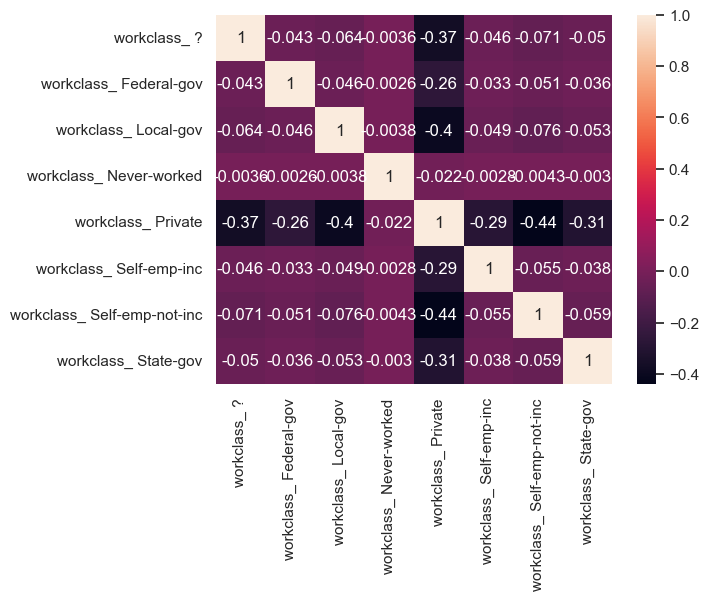

In [19]:
sns.heatmap(features.iloc[:,2:10].corr(),annot=True)

In [22]:
sorted_features=features.corr().unstack().sort_values(kind="quicksort")

In [23]:
print(sorted_features)

gender_ Female                gender_ Male                   -1.000000
gender_ Male                  gender_ Female                 -1.000000
workclass_ Private            workclass_ Self-emp-not-inc    -0.441289
workclass_ Self-emp-not-inc   workclass_ Private             -0.441289
workclass_ Local-gov          workclass_ Private             -0.397547
                                                                ...   
education_ Prof-school        education_ Prof-school          1.000000
education_ Preschool          education_ Preschool            1.000000
education_ Masters            education_ Masters              1.000000
occupation_ Armed-Forces      occupation_ Armed-Forces        1.000000
occupation_ Transport-moving  occupation_ Transport-moving    1.000000
Length: 1936, dtype: float64


In [24]:
print(sorted_features[abs(sorted_features)>.5])

gender_ Female                 gender_ Male                    -1.000000
gender_ Male                   gender_ Female                  -1.000000
workclass_ ?                   occupation_ ?                    0.997985
occupation_ ?                  workclass_ ?                     0.997985
age                            age                              1.000000
occupation_ Sales              occupation_ Sales                1.000000
education_ Assoc-acdm          education_ Assoc-acdm            1.000000
education_ 9th                 education_ 9th                   1.000000
education_ 7th-8th             education_ 7th-8th               1.000000
education_ 5th-6th             education_ 5th-6th               1.000000
education_ 1st-4th             education_ 1st-4th               1.000000
education_ 12th                education_ 12th                  1.000000
education_ 11th                education_ 11th                  1.000000
education_ 10th                education_ 10th     

In [25]:
features=features.drop(columns=["gender_ Male","occupation_ ?"])

X=features.values
y=data_dummies['income_ >50K'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81
